In [1]:
import shap
import joblib
import pickle
import numpy as np
from scipy.special import softmax
from utils.models import Classification
from utils.model_evaluation import performance_evaluate, _read_model
from sklearn.preprocessing import StandardScaler

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# Golden Valid Dataset
valid_file = "real2_final"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/feature_set_{valid_file}_final.pickle"
with open(f'{filename}', 'rb') as handle:
    valid_dataset = pickle.load(handle)
x_valid, y_valid = valid_dataset["median_input"].to_numpy(), valid_dataset["y_label"].to_numpy()

In [3]:
# Only run if combined
combined_model_valid = valid_dataset.copy()
combined_model_valid["median_input"]["is_syn"] = 0
x_valid, y_valid = combined_model_valid["median_input"].to_numpy(), combined_model_valid["y_label"].to_numpy()

In [5]:
# Read Feature File
file = "real1_final"
# long_name = f"feature_set_{file}_final.pickle"
# long_name = "combined_dataset.pickle"
long_name = f"combined_dataset_real1_syn3_4.pickle"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/{long_name}"
with open(f'{filename}', 'rb') as handle:
    dataset = pickle.load(handle)

classifier = Classification()

 Macro Precision :  0.97, Recall :  0.97, F1 :  0.97
 Micro Precision :  0.97, Recall :  0.97, F1 :  0.97
 binary Precision :  0.98, Recall :  0.94, F1 :  0.96


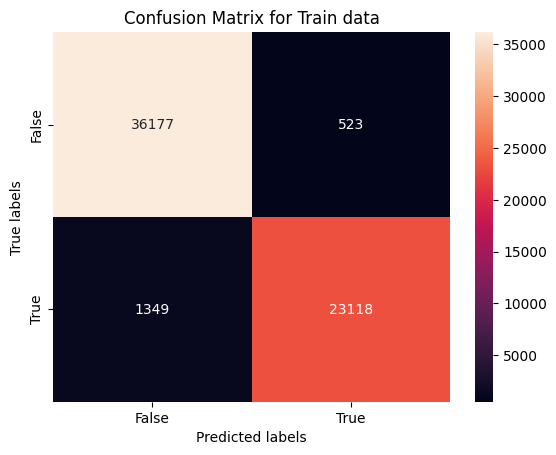

 Macro Precision :  0.97, Recall :  0.91, F1 :  0.94
 Micro Precision :  1.00, Recall :  1.00, F1 :  1.00
 binary Precision :  0.95, Recall :  0.82, F1 :  0.88


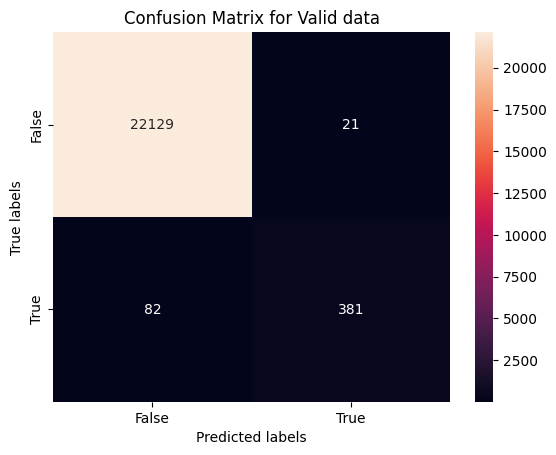

In [6]:
# file = "syn1_final"
model_name = f"{file}_median_impute_rf"
# model_name = f"{file}_median_impute_rf_increase_split"
model_name = "combined_dataset_real1_syn3_4_median_impute_rf"

x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy()

performance_evaluate(
    train_dataset=(x_train, y_train),
    valid_dataset=(x_valid, y_valid),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


In [7]:
print(f"shape values for {model_name}")

model = _read_model(
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)

In [12]:
# Fits the explainer
explainer = shap.Explainer(model.predict, x_valid)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_valid)

PermutationExplainer explainer: 22614it [27:48, 13.49it/s]                           


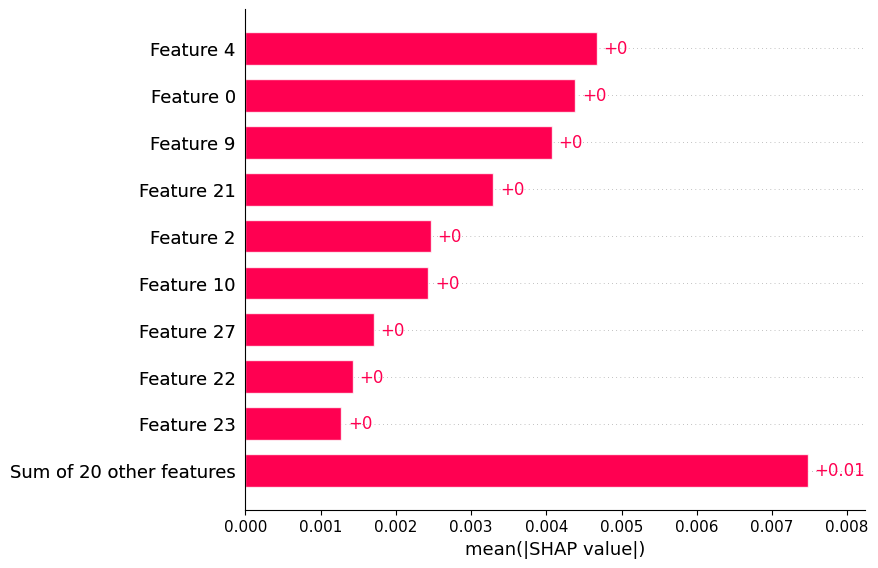

In [13]:
shap.plots.bar(shap_values)

In [7]:
print(f"shape values for {model_name}")
model = _read_model(
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)

# Fits the explainer
explainer = shap.Explainer(model.predict, x_valid)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_valid)

shape values for combined_dataset_real1_syn3_4_median_impute_rf


PermutationExplainer explainer: 22614it [32:02, 11.75it/s]                            


In [ ]:
# selected_features = [all_df.columns[i] for i in [0,2,4,21,22,10,8,7,3]]
['FILTER_Mutect2',
 'FILTER_Vardict',
 'm2_MQ',
 'vs_SPV',
 'vs_SSC',
 'f_MQM',
 'm2_NLOD',
 'm2_MQRankSum',
 'FILTER_Varscan']

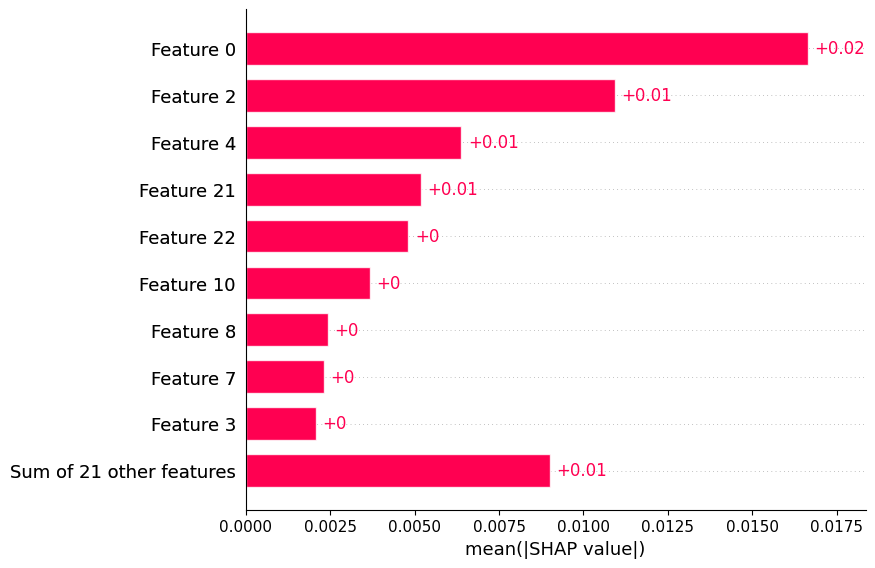

In [8]:
shap.plots.bar(shap_values)

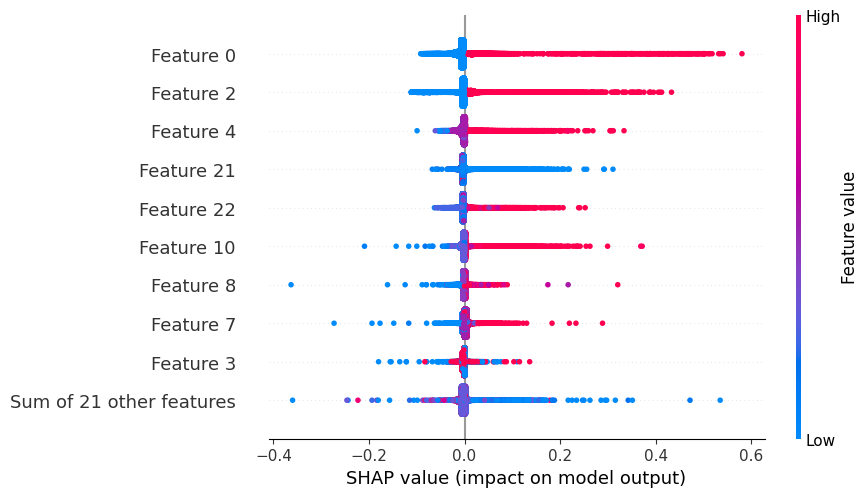

In [9]:
shap.plots.beeswarm(shap_values)